# Latin Hypercube Sampling
Author: Dimitris Giovanis
Date: May 12, 2020

In this example, the Latin Hypercube design is employed to generate samples from a normal distribution. The method illustrates various aspects of the UQpy LHS class. 

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the LHS class from UQpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
from UQpy.Distributions import Uniform, Normal
from UQpy.SampleMethods import LHS

dist1 = Normal(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

UQpy: Running Latin Hypercube sampling...
UQpy: Achieved minimum correlation of  0.005781280943359616
Successful execution of LHS design.
[[0.34067521 0.        ]
 [0.12358537 0.        ]
 [0.55223932 0.13132101]
 [0.61753987 0.29902594]
 [0.83024346 0.95512777]]
[[-0.41062106  0.00134129]
 [-1.15724875  0.61613134]
 [ 0.13132101  0.94641135]
 [ 0.29902594  0.58324007]
 [ 0.95512777  0.2994524 ]]


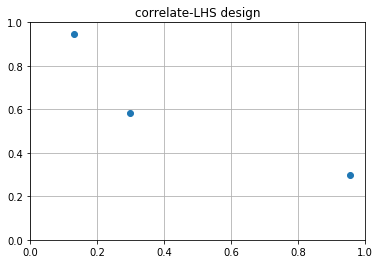


UQpy: Running Latin Hypercube sampling...
UQpy: Achieved maximum distance of  0.44081766144184664
Successful execution of LHS design.
[[4.50612467 0.78170156]
 [3.52017634 0.90123165]
 [3.19120877 0.08672976]
 [4.72359786 0.31643631]
 [3.86630788 0.47842145]]


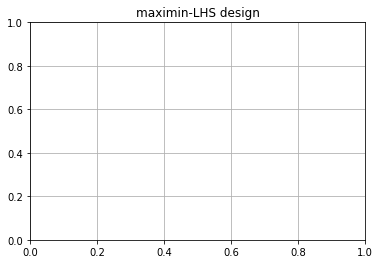


UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
[[3.16261656 0.32703663]
 [4.83926826 0.8998834 ]
 [3.62316527 0.41073431]
 [4.51648216 0.64922723]
 [4.09111038 0.02517862]]


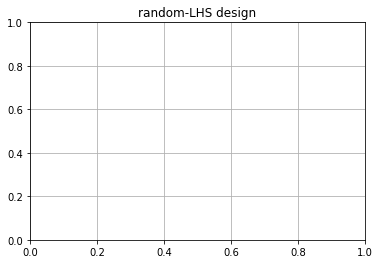


UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
[[0.1        1.47559949]
 [0.3        2.52440051]
 [0.5        3.28155157]
 [0.9        0.71844843]
 [0.7        2.        ]]
[[0.1        0.02871656]
 [0.3        0.04456546]
 [0.5        0.0668072 ]
 [0.9        0.13566606]
 [0.7        0.09680048]]


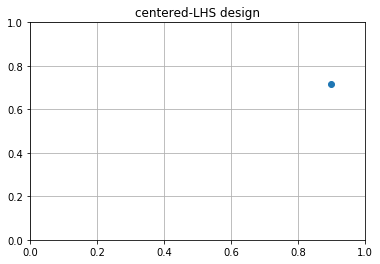

In [3]:
x1a = LHS(dist_object=[dist1, dist2], criterion='correlate', nsamples=5, verbose=True)
x1a.transform_u01()
print(x1a.samplesU01)
print(x1a.samples)

fig, ax = plt.subplots()
plt.title('correlate-LHS design')
plt.scatter(x1a.samples[:, 0], x1a.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()


print()
dist1 = Uniform(loc=3, scale=2.)
dist2 = Uniform(loc=0., scale=1.)
x1b = LHS(dist_object=[dist1, dist2], criterion='maximin', nsamples=5, verbose=True)
print(x1b.samples)

fig, ax = plt.subplots()
plt.title('maximin-LHS design')
plt.scatter(x1b.samples[:, 0], x1b.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

print()
x1c = LHS(dist_object=[dist1, dist2], nsamples=5, verbose=True)
print(x1c.samples)

fig, ax = plt.subplots()
plt.title('random-LHS design')
plt.scatter(x1c.samples[:, 0], x1c.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

print()
dist1 = Uniform(loc=0., scale=1.)
dist2 = Normal(loc=2., scale=1.)
x1d = LHS(dist_object=[dist1, dist2], criterion='centered', nsamples=5, verbose=True)
x1d.transform_u01()
print(x1d.samples)
print(x1d.samplesU01)

fig, ax = plt.subplots()
plt.title('centered-LHS design')
plt.scatter(x1d.samples[:, 0], x1d.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

In [12]:
def distance(x):
    return x + 1

def criterion():
    samples_in_U_ab = np.atleast_2d(np.array([1., 1.]))
    return samples_in_U_ab

dist1 = Uniform(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)
x1e = LHS(dist_object=[dist1, dist2], nsamples=5, criterion=criterion, metric=distance, verbose=True)
print(x1e.samples)

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [5]:
from UQpy.Distributions import Normal, Lognormal, JointInd
marginals = [Normal(loc=2., scale=2.), Lognormal(s=1., loc=0., scale=np.exp(5))]
dist = JointInd(marginals=marginals)

x2 = LHS(dist_object=dist, nsamples=5, criterion='maximin', verbose=True)
x2.transform_u01()
print(x2.samples)
print(x2.samplesU01)

UQpy: Running Latin Hypercube sampling...
UQpy: Achieved maximum distance of  0.4270870478099739
Successful execution of LHS design.
[[1.87116245e-01 9.89733914e+01]
 [2.33972232e+00 5.44494607e+01]
 [3.13414047e+00 6.78669095e+02]
 [9.79430897e-01 2.94827947e+02]
 [5.22364842e+00 1.63236110e+02]]
[[0.18235101 0.34268401]
 [0.56744034 0.15799629]
 [0.71466677 0.93576131]
 [0.30492606 0.75376701]
 [0.9464999  0.53792109]]
